# Signal Processing
### Utils

In [6]:
import pandas as pd
from scripts.util import *
step_meters=4.5
files = ["Device1","Device2","Device3"]
stats = []
for filename in files:
    # open file and read RSSI signal
    input_file = pd.read_csv("data/"+filename+".csv")
    signal = input_file['rssi']
    signal_kalman = function_per_step(input_file, kalman)
    distance = input_file['distance']

    # Find Median, Find steps
    signal_median = function_per_step(input_file, median)
    steps = np.array(find_steps(distance.values, meters_per_step=step_meters))

    # Fit Logarithmic curve of signal loss to median
    C, residual = find_coeficient(steps, signal_median)
    log_of_distance_discrete = log_fit(steps, C)
    log_of_distance_raw = log_fit(distance * step_meters, C)
    # Inverse of logarithmic function to visualize distance over signal, make it lineal
    distance_infered = rssi_to_distance(signal, C)
    distance_infered_median = rssi_to_distance(signal_median, C)

    stats.append((filename,signal,distance,signal_median,steps,C,
                  log_of_distance_discrete,log_of_distance_raw,
                  distance_infered,distance_infered_median,residual,signal_kalman))


def graph(index):
    _filename, _signal, _distance, _signal_median, _steps, _C, _log_of_distance_discrete, _log_of_distance_raw, _distance_infered, _distance_infered_median, _residual, _signal_kalman = stats[index]
    # Graph it All!
    plot_signals([_signal, _signal_kalman], [_filename, 'Kalman_filter'], xlabel="Meters", ylabel="Signal",
                 title="Signal vs Kalman filtered",
                 xi=_distance * step_meters)

    plot_signals([_signal_kalman, _log_of_distance_raw], [_filename, 'log_regression'], xlabel="Meters",
                 ylabel="Signal",
                 title="Signal vs Distance C=" +
                       str(_C) + " R%= " + str(_residual),
                 xi=_distance * step_meters)

    plot_signals([_signal_median, _log_of_distance_discrete], [_filename, 'log_regression'], title="Signal Median vs "
                 "Distance  C=" + str(_C) + " R%= " + str(_residual),xi=_steps)

    plot_signals([_distance_infered,kalman(_distance_infered), rssi_to_distance(_log_of_distance_raw, _C)], [_filename, "kalman",'log_regression'],
                 xlabel="Step Measurement", ylabel="Predicted Distance",
                 title="Inverse log, C=" +
                       str(_C) + " R%= " + str(_residual),
                 xi=_distance)

    plot_signals([_distance_infered_median, rssi_to_distance(_log_of_distance_discrete, _C)],
                 [_filename, "log_regression"], xlabel="Step Measurement",
                 ylabel="Distance", title="Inverse Median C=" +
                                          str(_C) + " R%= " + str(_residual))

### Device1

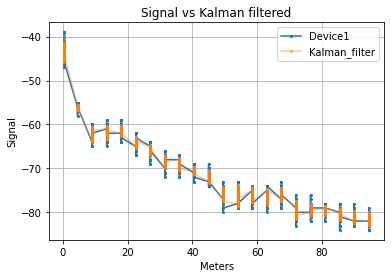

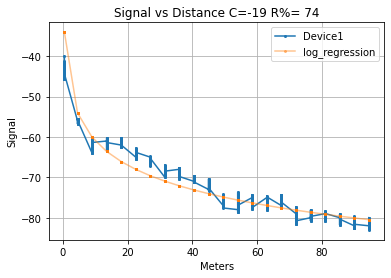

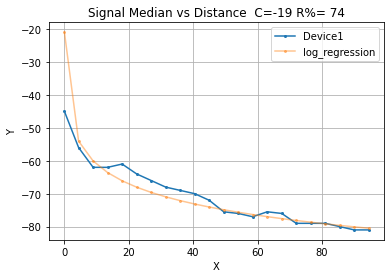

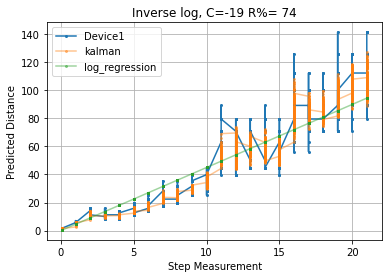

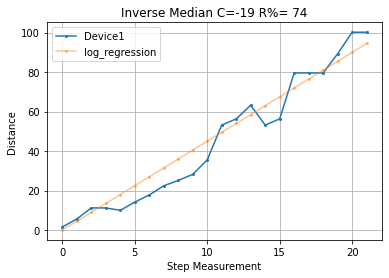

In [7]:
graph(0)

### Device2

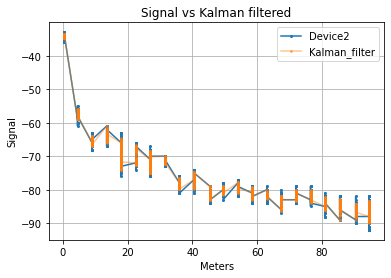

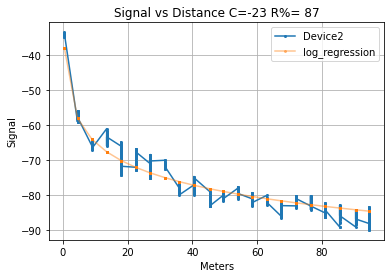

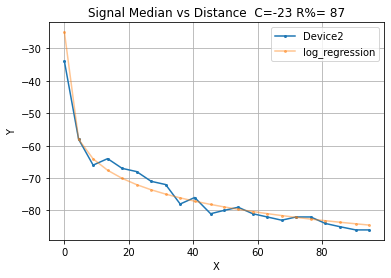

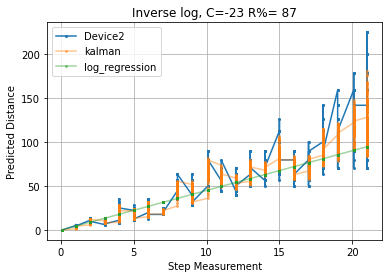

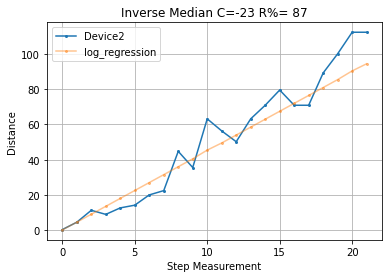

In [8]:
graph(1)

### Device3

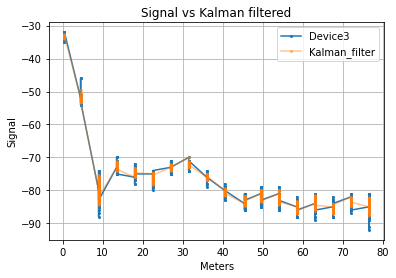

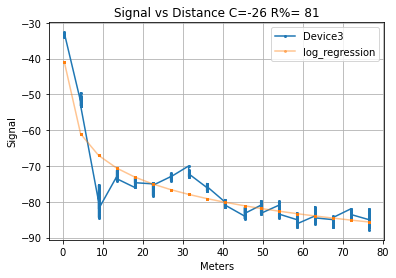

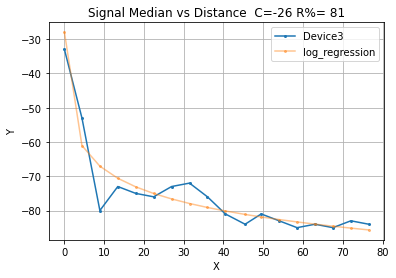

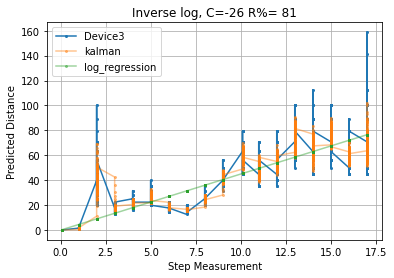

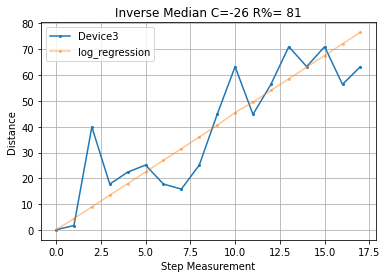

In [9]:
graph(2)

All

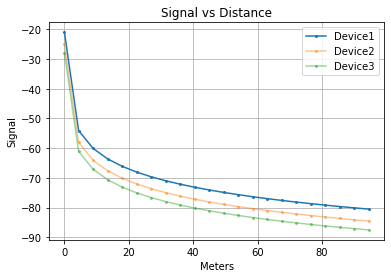

In [10]:
C_all = []
log_of_distance_discrete_all = []
filenames = []
steps_all = []
for i in range(len(stats)):
    filename_i, signal_i, distance_i, signal_median_i, steps_i, C_i, log_of_distance_discrete_i, log_of_distance_raw_i, distance_infered_i,distance_infered_median_i,residual_i,signal_kalman_i = stats[i]
    C_all.append(C_i)
    log_of_distance_discrete_all.append(log_of_distance_discrete_i)
    filenames.append(filename_i)
    steps_all.append(steps_i)

# Override Walter steps as it is shorter
log_of_distance_discrete_all[2] = log_fit(np.array(steps_all[0]), C_all[2])

plot_signals(log_of_distance_discrete_all, filenames, xlabel="Meters", ylabel="Signal",
                 title="Signal vs Distance",xi=steps_all[0])
